In [1]:
using Revise, CMBLensing, Images, TestImages, PyPlot

In [2]:
arr = imresize(Images.gray.(float.(testimage("fabio_gray"))), (100,236));

# Lambert projection

Make flat-sky (Lambert projection) map:

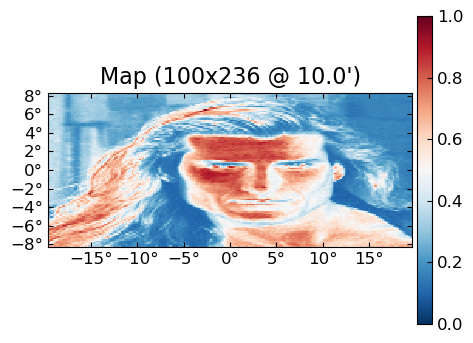

In [3]:
f = LambertMap(arr, θpix=10, rotator=(0,40,10))
plot(f, vlim=[(0,1)]);

Project up to sphere:

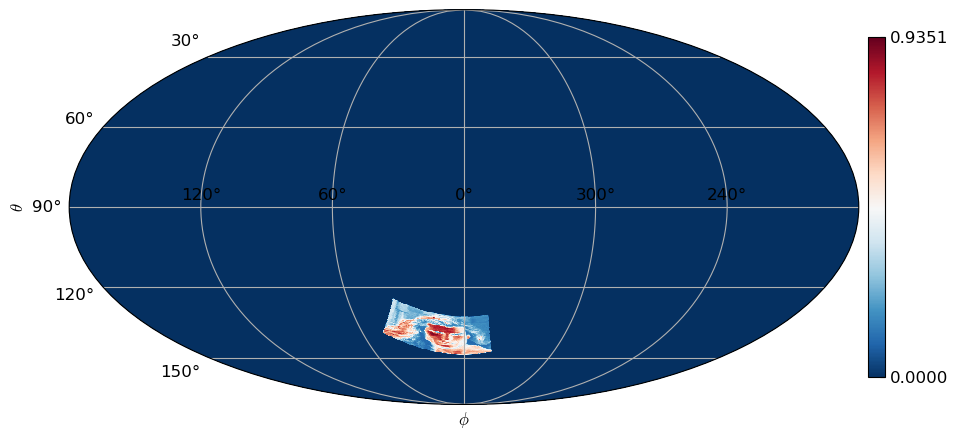

In [4]:
h = project(f => ProjHealpix(512))
plot(h);

Project back to Lambert, and check it survived the round-trip:

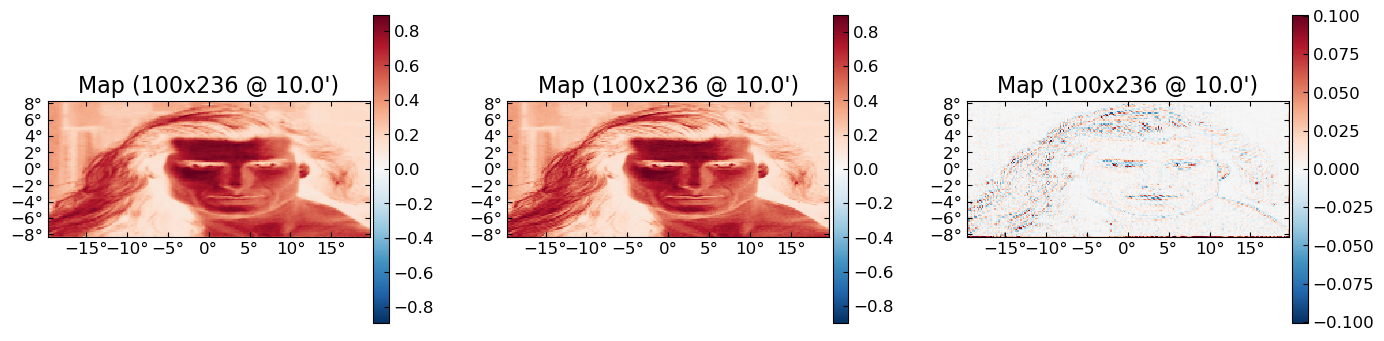

In [5]:
f′ = project(h => f.proj)
plot([f′ f (f-f′)])

# EquiRectangular

Now do the same with the new EquiRect map type:

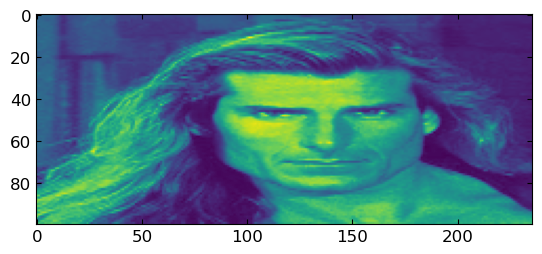

In [9]:
f = EquiRectMap(arr, θspan = deg2rad.(180 .+ (-40,-70)), ϕspan = deg2rad.((-10,90)))
imshow(f.arr); # no special plot function for EquiRectMaps implemented yet

Note below the mirroring in the $x$-direction, unlike the Lambert case above. This is "intentional", and a consequence of
1. I want keep the projection super straightforward, $x=\phi$ and $y=\theta$. 
2. The default "astro" convention has $\phi$ increasing to the left, as you see (consistently) labeled on the plot below.
3. The plotting convention of `imshow`, used above to plot the 2D image. 

That said, I'm not married to either this or the Lambert convention, if you have something you think is better. 

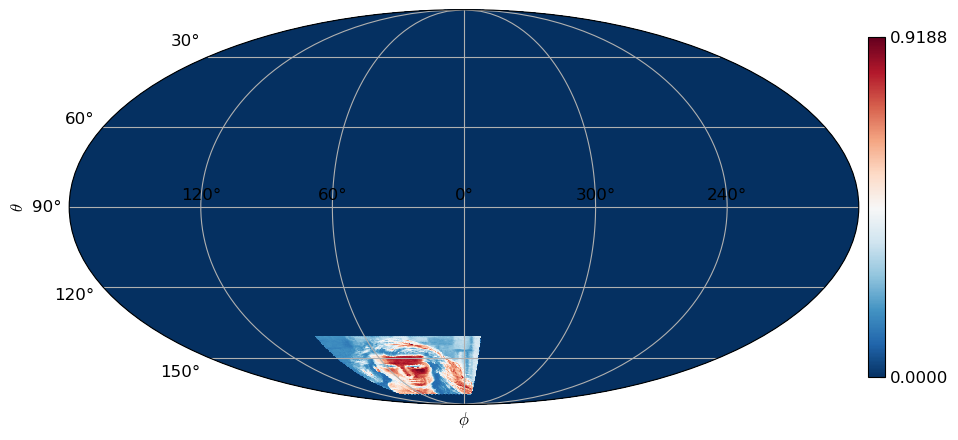

In [10]:
h = project(f => ProjHealpix(512))
plot(h);

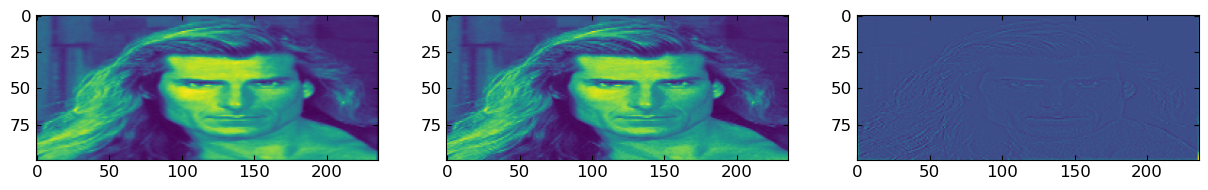

In [11]:
f′ = project(h => f.proj)
figure(figsize=(15,5))
subplot(131).imshow(f′.arr)
subplot(132).imshow(f.arr)
subplot(133).imshow((f-f′).arr);